# 라이브러리 불러오기

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.style.use('fivethirtyeight')
sns.set(font_scale = 1.0)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#모델
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# 평가지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cross Validation
from sklearn.model_selection import TimeSeriesSplit , train_test_split, GridSearchCV, cross_val_score

# 구글 드라이브 연결

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 데이터셋 불러오기

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/CodeStates/CP1/강남_아파트_실거래가예측_for_modeling_2017_2020.csv')
df.drop('Unnamed: 0', axis = 1,inplace=True)
df.head()

,index,구,동,단지명,거래금액(만원),1km내_유치원수,유치원_최소거리,1km내_지하철역수,지하철역_최소거리,1km내_문화시설수,...,floor_group,popul_pca,boxcox_amount,log_kinder,log_school,log_study,log_culture,log_park,log_subway,Dong_Group
0,0,강남구,삼성동,서광아파트,108000,5,0.350656,6,0.433154,14,...,1,-0.677153,196.808887,0.300591,0.324677,0.069726,0.075447,0.692782,0.359878,6
1,1,강남구,삼성동,서광아파트,120000,5,0.350656,6,0.433154,14,...,3,-0.677153,204.772389,0.300591,0.324677,0.069726,0.075447,0.692782,0.359878,6
2,2,강남구,삼성동,서광아파트,149000,5,0.350656,6,0.433154,14,...,3,-0.677153,222.144111,0.300591,0.324677,0.069726,0.075447,0.692782,0.359878,6
3,3,강남구,삼성동,서광아파트,121000,5,0.350656,6,0.433154,14,...,1,-0.365096,205.412983,0.300591,0.324677,0.069726,0.075447,0.692782,0.359878,6
4,4,강남구,삼성동,서광아파트,149000,5,0.350656,6,0.433154,14,...,3,-0.313550,222.144111,0.300591,0.324677,0.069726,0.075447,0.692782,0.359878,6


In [ ]:
df.dtypes

index                        int64
구                           object
동                           object
단지명                         object
거래금액(만원)                     int64
1km내_유치원수                    int64
유치원_최소거리                   float64
1km내_지하철역수                   int64
지하철역_최소거리                  float64
1km내_문화시설수                   int64
문화시설_최소거리                  float64
1km내_공원수                     int64
공원_최소거리                    float64
1km내_학교수                     int64
학교_최소거리                    float64
1km내_학원수                     int64
학원_최소거리                    float64
계약일자                        object
top10                        int64
construction_year_group      int64
area_range                  object
area_range_group             int64
floor_group                  int64
popul_pca                  float64
boxcox_amount              float64
log_kinder                 float64
log_school                 float64
log_study                  float64
log_culture         

In [ ]:
df.describe()

,index,거래금액(만원),1km내_유치원수,유치원_최소거리,1km내_지하철역수,지하철역_최소거리,1km내_문화시설수,문화시설_최소거리,1km내_공원수,공원_최소거리,...,floor_group,popul_pca,boxcox_amount,log_kinder,log_school,log_study,log_culture,log_park,log_subway,Dong_Group
count,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,...,18351.000000,1.835100e+04,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000
mean,9361.192360,155796.542259,3.718544,0.351613,1.942564,0.408780,5.520244,0.411444,0.654406,0.358254,...,1.171108,7.434156e-17,218.747734,0.291683,0.250611,0.103336,0.332036,0.271447,0.322360,4.868781
std,5597.795252,80692.448859,1.478553,0.189669,1.315087,0.282545,3.654240,0.226099,0.664566,0.357599,...,1.178063,2.000443e+00,43.904181,0.138123,0.111023,0.061517,0.158034,0.263545,0.202771,3.275589
min,0.000000,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.367331e+00,93.126480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4587.500000,98000.000000,3.000000,0.214553,1.000000,0.184735,2.000000,0.224889,0.000000,0.000000,...,0.000000,-2.078215e+00,189.736129,0.194376,0.173065,0.062573,0.202850,0.000000,0.169519,2.000000
50%,9175.000000,143000.000000,4.000000,0.341231,2.000000,0.388554,5.000000,0.379687,1.000000,0.366128,...,1.000000,-9.757840e-04,218.737140,0.293588,0.241790,0.094080,0.321857,0.311981,0.328263,4.000000
75%,13762.500000,197000.000000,5.000000,0.449101,3.000000,0.629401,9.000000,0.573407,1.000000,0.665437,...,2.000000,1.157437e+00,246.722159,0.370943,0.310051,0.131672,0.453244,0.510088,0.488213,7.000000
max,20219.000000,700000.000000,7.000000,0.988686,7.000000,0.999331,16.000000,0.981981,2.000000,0.999269,...,8.000000,3.771104e+00,396.773019,0.687474,0.634502,0.352844,0.684097,0.692782,0.692813,14.000000


# Dataset 나누기

- 시계열 데이터를 사용하므로, TimeSeriesSplit을 방법으로 데이터를 나눈다.


In [4]:
# Dataset split
target = ['boxcox_amount']
feature = ['Dong_Group','1km내_유치원수','1km내_지하철역수','1km내_문화시설수','1km내_공원수','1km내_학교수', '1km내_학원수',
                'floor_group', 'top10', 'construction_year_group', 'area_range_group',
           'log_kinder','log_school','log_study', 'log_culture', 'log_park', 'log_subway','popul_pca']

X = df[feature]           
y = df[target]

tscv = TimeSeriesSplit(n_splits=10)

# 모델 생성

- Cross validation(TimeSeriesSplit)을 통해 다음의 모델들의 성능을 비교함
    - Linear Regression
    - Ridge Regression
    - SVM 
    - Decision Tree Regression
    - Random Forest Regression
    - ExtraTree Regression
    - AdaBoost
    - XGBoost Regression

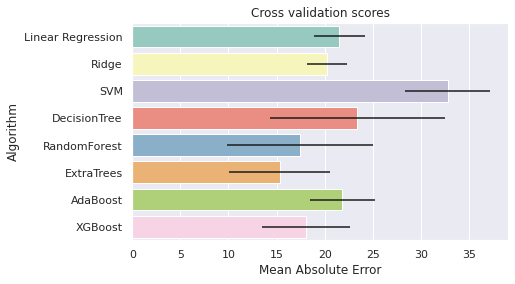

In [ ]:
random_state = 42
models = []
models.append(LinearRegression(n_jobs=-1))
models.append(Ridge(random_state =random_state))
models.append(SVR())
models.append(DecisionTreeRegressor(random_state=random_state))
models.append(RandomForestRegressor(n_jobs=-1, random_state=random_state))
models.append(ExtraTreesRegressor(n_jobs=-1,random_state=random_state))
models.append(AdaBoostRegressor(random_state=random_state))
models.append(XGBRegressor(random_state=random_state))

cv_results = []
for model in models:
    cv_results.append(cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error',
                                      cv = tscv, n_jobs=-1)) #MAE를 평가지표로 사용

cv_means = []    
cv_std = []
for cv_result in cv_results:
    cv_means.append(-1*cv_result.mean()) # 해석하기 쉽도록 음수값을 양수로 변환
    cv_std.append(-1*cv_result.std()) #해석하기 쉽도록 음수값을 양수로 변환    

cv_res = pd.DataFrame({'CrossValMeans': cv_means, 'CrossValerrors': cv_std, 
                       'Algorithm':['Linear Regression', 'Ridge', 'SVM', 'DecisionTree', 'RandomForest', 'ExtraTrees',
                                            'AdaBoost', 'XGBoost']}) 
g = sns.barplot('CrossValMeans', 'Algorithm', data = cv_res, palette='Set3', orient='h',
                **{'xerr':cv_std})   
g.set_xlabel('Mean Absolute Error')
g = g.set_title('Cross validation scores')

> MAE가 제일 낮은 `ExtraTree 모델`을 최종적으로 선택하여 HyperParameter Tuning을 진행함

In [ ]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,21.533689,-2.681172,Linear Regression
1,20.263693,-2.106433,Ridge
2,32.784386,-4.438350,SVM
3,23.400318,-9.120443,DecisionTree
4,17.482503,-7.589538,RandomForest
5,15.311785,-5.242515,ExtraTrees
6,21.848323,-3.338334,AdaBoost
7,18.033864,-4.550830,XGBoost


In [11]:
# Base 모델의 정확한 평가를 위해, Hold-out 방법으로 모델을 한번 더 평가함
random_state = 42
model = ExtraTreesRegressor(n_jobs=-1,random_state=random_state)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                    shuffle=False) # 시계열 데이터이므로, 섞지않는다
model.fit(X_train, y_train)                                                    
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)
print('MAPE : ', mape)
print('R2 : ', r2)

MAE :  11.223817894309926
MSE :  224.0297651287681
RMSE :  14.967623897224573
MAPE :  21.734473762577128
R2 :  0.8622302239256111


# HyperParameter Tuning

- Grid Search 방법을 이용하여 모델을 최적화

In [ ]:
ExtR = ExtraTreesRegressor(n_jobs = -1, random_state = random_state)

ex_param_grid = {'max_features': [None],
                                'min_samples_split': [2, 4],
                                'min_samples_leaf': [2, 4],
                                'n_estimators': [300, 500]}

gsExtC = GridSearchCV(ExtR, param_grid = ex_param_grid, cv = tscv, 
                      scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

gsExtC.fit(X, y)
ExtC_best = gsExtC.best_estimator_
print('Best Score :', gsExtC.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Score : -15.215216686564869


In [ ]:
gsExtC.best_params_

{'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

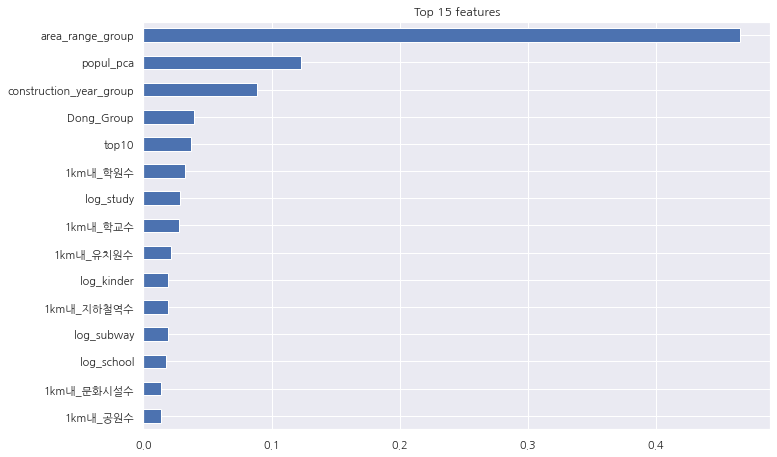

In [ ]:
# 특성 중요도 확인
importances = pd.Series(ExtC_best.feature_importances_, X.columns)

n = 15
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [17]:
# Best model의 성능평가
y_pred = ExtC_best.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)
print('MAPE : ', mape)
print('R2 : ', r2)

MAE :  4.356507581038305
MSE :  41.09595622058915
RMSE :  6.410612780428182
MAPE :  22.799702787609746
R2 :  0.9747275515696802


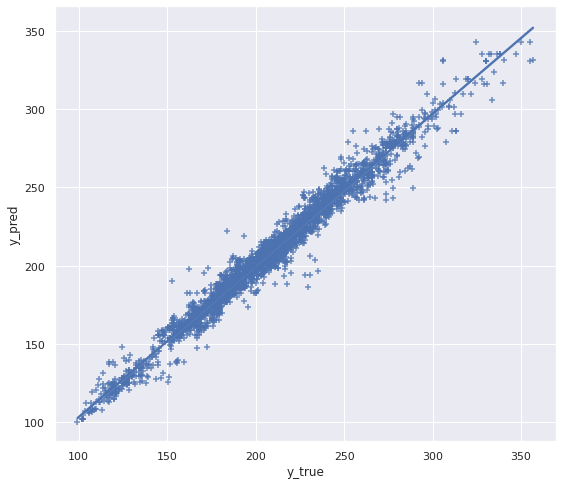

In [51]:
# 예측 모델 성능 시각화
df_y_pred = pd.DataFrame(y_pred)
df_y_test = y_test.reset_index(drop=True)

df_graph = pd.concat([df_y_test, df_y_pred], axis=1)
df_graph = df_graph.rename(columns={'boxcox_amount': 'y_true', 0:'y_pred'})

plt.figure(figsize=(8,8))
sns.regplot(x='y_true', y='y_pred', data=df_graph, marker="+")
plt.show()

In [ ]:
import joblib
joblib.dump(ExtC_best, '/content/gdrive/MyDrive/CodeStates/CP1/Best_ExtraTrees.pkl')

['/content/gdrive/MyDrive/CodeStates/CP1/Best_ExtraTrees.pkl']